# 🧠 Introduction  
### We Crave Stories — But Randomness Writes the Script

There is an evident statistical regularity hidden in plain sight — one that, when ignored, quietly shapes football narratives, fuels misjudgments, and silently distorts careers: **regression to the mean**.

If you're a football fan, like me — since the beginning of my childhood — big effect of my grandfather being a fan and serving on the council committee of [_Beşiktaş JK_](https://x.com/siyahbeyazarsiv/status/1372974851519037448). And if you're a football fan, with the pull of confirmation bias, you're often inclined to validate your team’s decisions, even when they’re performing bad. You see what you hope to see. Or sometimes you're affected by the crowd's opinion, and make up stories about the bad performance, usually ends up finding a scapegoat, perfect fit for the situation. And boo him/her, maybe?

And in most football clubs — especially the ones that are not data-driven or digital-native (which is most of them, outside the privileged few) — the decision-making at the management level is often no different from that of the fans. In some contexts, it may even be worse.

They, too, seek causality. They crave a clean narrative, and illuminate the ambiguity. But football doesn’t always offer causal clarity. And in that search for meaning, we often miss what’s actually going on: plain old randomness. It shows up looking like form, momentum, or a player in decline — but it’s just luck, really.

This post is about that hidden force — how it works, how it deceives us, and how it affects players, coaches, analysts, and fans alike.

With a simple simulation, some stats, and a bit of honest thinking about how we judge performances, we’re going to break down how luck often looks like talent or failure. And how regression to the mean offers a much-needed antidote.

Let’s begin there.

# 📊 What Is Regression to the Mean?
### The Stats Behind the Narrative We Keep Misreading

> Regression to the mean refers to the tendency for an unusually high or low measurement to be followed by one that is closer to the average.

**Regression to the mean** is a statistical principle that explains how extreme performances — whether good or bad — are likely to be followed by more average ones. Not because the player necessarily changed, but because the original extreme performance was at least partially due to **chance**.

In football context, it doesn't imply that **skill disappears** or **suddenly changes** — just that outliers are often products of both true ability and **random fluctuations**. And randomness has a way of balancing itself out.

Our brain is a **causality machine**. We hate things we can’t form causal relationships with. Whenever we see outstanding or disastrous performances, our minds activate to seek some causal explanation.

But in some cases — like the ones we’ll explore — **there’s no such explanation nor a narrative**.

Let’s try to simplify the context and run a modest simulation to better understand and visualise this ubiquitous statistical phenomenon that our brains refuse to internalise each time.

---


# Simulation: Building a Synthetic Season
### Performance = Skill + Luck


To understand regression to the mean in action, we’ll build a simple simulation with 100 football players. Each of them has an underlying **true skill level**, which stays stable throughout the season, as an assumption. But performance in any given match isn’t just about skill — it’s also shaped by **random factors**: weather, team tactics, referee decisions, opponent strength, even the player’s mood...

> 💬 *"What has mood to do with it? You fight when the necessity arises—no matter the mood! Mood's a thing for cattle or making love or playing the baliset."*  
> — **Gurney Halleck**, *Dune*

In Herbert's Dune, maybe by the year 10191 maybe humanity will clarify what's luck in most contexts. But nowadays because it's so random and it's beyond our mind's capabilities we have words for the things we're unable to grasp in detail. In statistical sense, you can call it **noise** but I'll stick to a colloquial word and just call it plain **luck**.

That’s what makes evaluating players so tricky. A single game or a few might reflect as much **randomness** as it does **ability**.

In this simulation:

- `true_skill` represents each player's consistent ability.
- `performance_noise` models the randomness from match to match.
- We simulate **two periods** (e.g., first half and second half of the season) and calculate the player's rating as:
$$
\text{rating} = \text{true skill} + \text{luck}
$$
- To keep things realistic, we **clip** ratings between 4 and 10 — mimicking how football ratings often work in media and analytics platforms.

This simulation helps us visualize how **players who seem "in form" or "out of form" may just be experiencing natural statistical fluctuations** — not actual shifts in talent or effort.

Let’s generate the data:


In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from scipy.stats import zscore

# --- Data Generation ---
np.random.seed(1903) # bjk
n_players = 100
true_skill = np.random.normal(loc=6.2, scale=0.4, size=n_players)
performance_noise = np.random.normal(loc=0, scale=1.02, size=(n_players, 2))
ratings = true_skill.reshape(-1, 1) + performance_noise
ratings = np.clip(ratings, 4, 10)

df = pd.DataFrame({
    'Player': [f'Player {i+1}' for i in range(n_players)],
    'true_skill': true_skill,
    'rating_fh': ratings[:, 0],
    'rating_sh': ratings[:, 1]
})

To identify extreme performances, we standardize the match ratings using **z-scores** — measuring how far each player's rating deviates from the mean. We also calculate the **absolute z-scores** to find players closest to the average. This helps us group players into outliers (top, bottom) and typical performers.

In [2]:
# --- Metrics and Z-Scores ---
df['z_fh'] = zscore(df['rating_fh'])
df['z_sh'] = zscore(df['rating_sh'])
df['abs_z_fh'] = df['z_fh'].abs()
df['abs_z_sh'] = df['z_sh'].abs()
df

,Player,true_skill,rating_fh,rating_sh,z_fh,z_sh,abs_z_fh,abs_z_sh
0,Player 1,6.101051,5.929413,5.985455,-0.305738,-0.327427,0.305738,0.327427
1,Player 2,6.409244,6.000632,7.626949,-0.248300,1.196627,0.248300,1.196627
2,Player 3,6.577203,8.158082,8.206432,1.491674,1.734651,1.491674,1.734651
3,Player 4,5.098973,5.548365,4.241321,-0.613051,-1.946776,0.613051,1.946776
4,Player 5,5.607759,5.182377,5.234082,-0.908219,-1.025043,0.908219,1.025043
...,...,...,...,...,...,...,...,...
95,Player 96,6.050932,6.890647,7.597617,0.469493,1.169393,0.469493,1.169393
96,Player 97,6.513076,7.700980,7.368306,1.123023,0.956488,1.123023,0.956488
97,Player 98,6.082399,5.964342,7.386224,-0.277568,0.973124,0.277568,0.973124
98,Player 99,6.598208,7.423891,4.183947,0.899552,-2.000046,0.899552,2.000046


# First-Half Snapshot
## Dots That Deceive — Judging from One Half

Below, we’ve plotted ratings from the first half of the season for three distinct groups of players:

- 🟢 Top Performers (highest ratings, seemingly exceptional talent)
- 🔵 Average Performers (ratings around the mean, reliably consistent)
- 🔴 Worst Performers (lowest ratings, seemingly struggling players)

Each dot represents a player's rating. The dashed gray line shows the overall average rating (6.89).

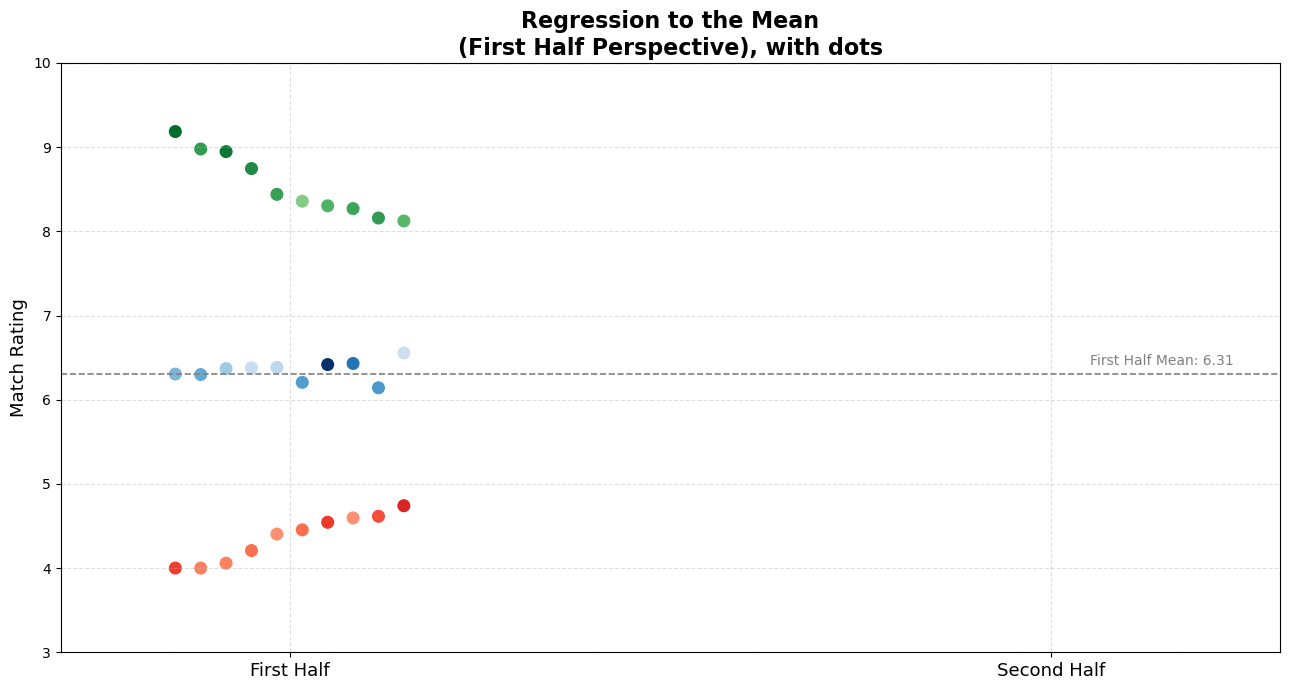

In [4]:
# --- Plot ---
fig, ax = plt.subplots(figsize=(13, 7))
plot_custom_dots(ax, best_fh, perspective='fh', reveal_other_half=False, cmap=cm.Greens, norm=norm)
plot_custom_dots(ax, worst_fh, perspective='fh', reveal_other_half=False, cmap=cm.Reds, norm=norm)
plot_custom_dots(ax, avg_fh, perspective='fh', reveal_other_half=False, cmap=cm.Blues, norm=norm)
ax.axhline(fh_mean, linestyle='--', color='gray', linewidth=1.2)
ax.text(2.05, fh_mean + 0.1, f'First Half Mean: {fh_mean:.2f}', color='gray', fontsize=10)
ax.set_title('Regression to the Mean\n(First Half Perspective), with dots', fontsize=16, weight='bold')
#ax.legend(handles=make_legend(best_fh, avg_fh, worst_fh), loc='lower right', fontsize=11)
plt.tight_layout()
plt.show()

## First-Half Narratives: “Exceptional!” “Average…” “Bench him!”

I've deliberately hidden these players' **second-half ratings**. Before revealing them, I'd like you to think deeply about the following questions:

- **How do you think these players performed in the second half?**
- **Who would you trust going forward?**
- **Who would you praise or criticize based on just this half-season snapshot?**

Pause here. Consider carefully before continuing. Make explicit or mental judgments based on the data you've seen so far.

I know—it's challenging to guess solely from these dots. To help you internalize, let me offer three relatable player narratives corresponding to each of the three groups.

Right now, you might be thinking something along these lines:

> **🟢 For the top performers:**  
> _“He’s exceptional! Clearly, a talent we can build around. He’s the future. We should renew his contract, or if we had to sell him, we should expect extreme amounts!”_

> **🔵 For the average performers:**  
> _“Solid player, but maybe lacking ambition. We need more exciting talent—someone who clearly makes a difference.”_

> **🔴 For the worst performers:**  
> _“He looks lethargic, uninterested. He simply doesn’t have the mental toughness to succeed at this level. Bench him.”_

These reactions are natural to the human mind, yet they might also be premature. 

Just about a second when you scroll down, you might encounter something counter-intuitive for you. Below, you'll see the same players' second half performances, too. 

--- 

### Reveal: Second-Half Performance | When the Curtain Drops — Reality Check

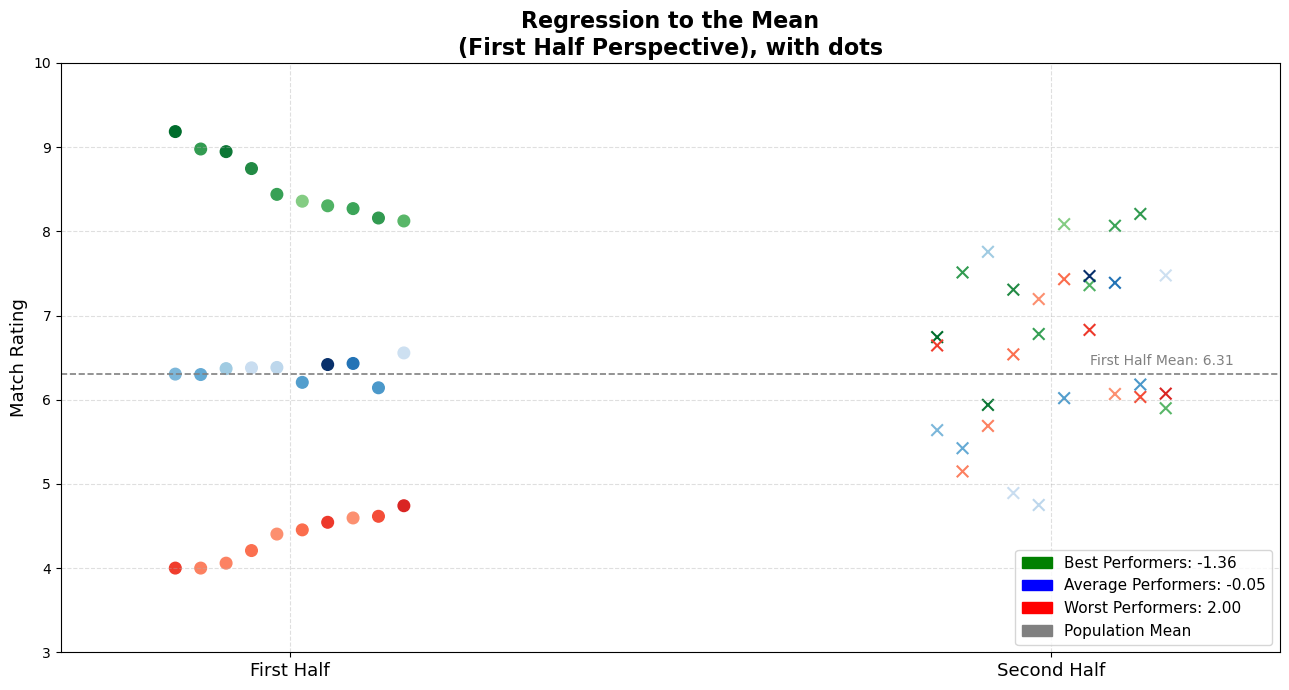

In [5]:
# --- Plot ---
fig, ax = plt.subplots(figsize=(13, 7))
plot_custom_dots(ax, best_fh, perspective='fh', reveal_other_half=True, cmap=cm.Greens, norm=norm)
plot_custom_dots(ax, worst_fh, perspective='fh', reveal_other_half=True, cmap=cm.Reds, norm=norm)
plot_custom_dots(ax, avg_fh, perspective='fh', reveal_other_half=True, cmap=cm.Blues, norm=norm)
ax.axhline(fh_mean, linestyle='--', color='gray', linewidth=1.2)
ax.text(2.05, fh_mean + 0.1, f'First Half Mean: {fh_mean:.2f}', color='gray', fontsize=10)
ax.set_title('Regression to the Mean\n(First Half Perspective), with dots', fontsize=16, weight='bold')
ax.legend(handles=make_legend(best_fh, avg_fh, worst_fh), loc='lower right', fontsize=11)
plt.tight_layout()
plt.show()

For better tracking, I prepared the observations in a way that lets you follow the players left to right on the x-axis. For example, you can now trace exactly how each top performer ended up performing in the second half, based on our modest simulation.

Also, the legend provides the **average change** in performance for each group — which is super useful context.

### Turns Out, the Story Changes…

When we reveal the hidden half, something remarkable happens:

- 🟢 **Top performers**  generally decline slightly, not catastrophically, but still, you can observe an evident decline. Also, enough to disappoint inflated expectations.
- 🔵 **Average players** mostly remain stable in average rating. But they ended up going both ways.
- 🔴 **Worst performers** notably improve, challenging the assumptions of incompetence or low motivation.

But most importantly, they distributed almost homogenously. We don't see three player categories conserved the distinction between them. This image is a visual representation of **regression to the mean** in action.

To make this transition more intuitive and visually obvious, here's another version of the same dataset — but this time with **arrows** connecting the two halves.

Each arrow shows a player's change from **first half** (dot origin) to **second half** (arrowhead):

- Direction: indicates movement.
- Color: matches the original grouping (green, blue, red).
- Length: shows how much the performance regressed toward the mean.


---

## Arrows That Regress
### How Everyone Moves Closer to the Mean

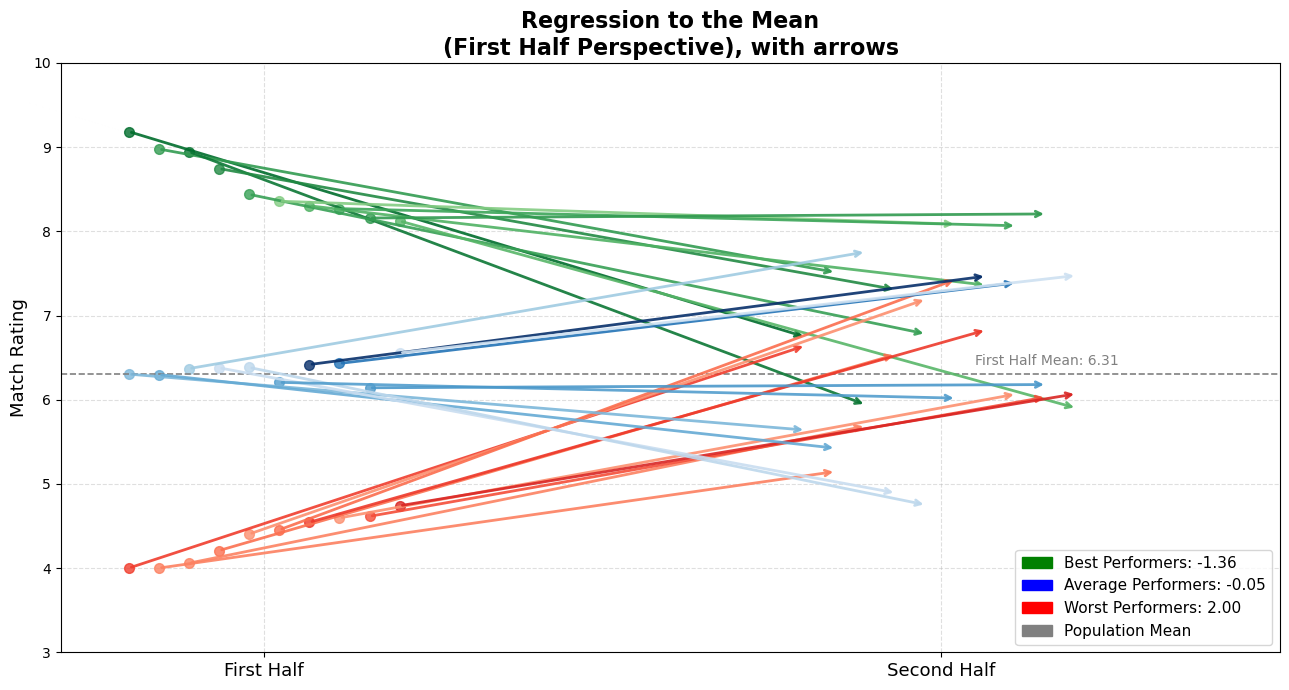

In [6]:
# --- Plot ---
fig, ax = plt.subplots(figsize=(13, 7))
plot_custom_arrows(ax, best_fh, perspective='fh', reveal_other_half=True, cmap=cm.Greens, norm=norm)
plot_custom_arrows(ax, worst_fh, perspective='fh', reveal_other_half=True, cmap=cm.Reds, norm=norm)
plot_custom_arrows(ax, avg_fh, perspective='fh', reveal_other_half=True, cmap=cm.Blues, norm=norm)
ax.axhline(fh_mean, linestyle='--', color='gray', linewidth=1.2)
ax.text(2.05, fh_mean + 0.1, f'First Half Mean: {fh_mean:.2f}', color='gray', fontsize=10)
ax.set_title('Regression to the Mean\n(First Half Perspective), with arrows', fontsize=16, weight='bold')
ax.legend(handles=make_legend(best_fh, avg_fh, worst_fh), loc='lower right', fontsize=11)
plt.tight_layout()
plt.show()

Visually or mathematically (shown in the legend), I think it's definitely salient how they got close to the average.

This arrow plot gives you an immediate sense of what's happening:

- Many of the top performers are **still good**, but they've regressed toward the average.
- The worst performers? Surprisingly decent now.
- The average ones? Holding the line.

It's clear: extreme observations tend to pull back toward the center.

---

## Regression Check: A Slope That Reveals the Pull

While our simulation illustrates how extremes tend to drift toward the average, we can also show it quantitatively via a simple linear regression. If we take each player’s first-half performance as a predictor and plot their second-half performance against it, we can fit a regression line to see how well one half predicts the other.

Specifically, if we take each player’s first-half rating as an independent variable (predictor) and second-half rating as the dependent variable (outcome), we typically see a regression slope less than 1. In a perfectly consistent world, the dots would fall on a 45-degree diagonal line — where every extreme performance repeats itself. That diagonal has a slope of 1.

In a simple linear regression of; $$\text{Second-Half Performance} = \text{ a } x \text{ b } x \text{ First-Half Performance } $$ 
the coefficient b (the “slope”) tells us how strongly the second-half scores scale with the first-half scores. A slope of 1 would mean that a player 1 point above average in the first half is predicted to be exactly 1 point above average in the second half. In other words, there would be no “pull” back toward the average.

But, because of the luck factors, the line we actually get isn’t that **steep**. It’s **flatter**. In our simulation, the regression line has a slope less than 1 because we added luck factor to true skill. That number might seem small, but it’s doing something big:


That number might seem small, but it’s doing something big:

- It pulls **high performers down**: If someone was far above average in the first half, the regression line predicts they’ll be closer to average in the second half.

- It pulls **low performers up**: If someone struggled early, it suggests they’ll bounce back — also drifting toward the middle.

Check this plot out:

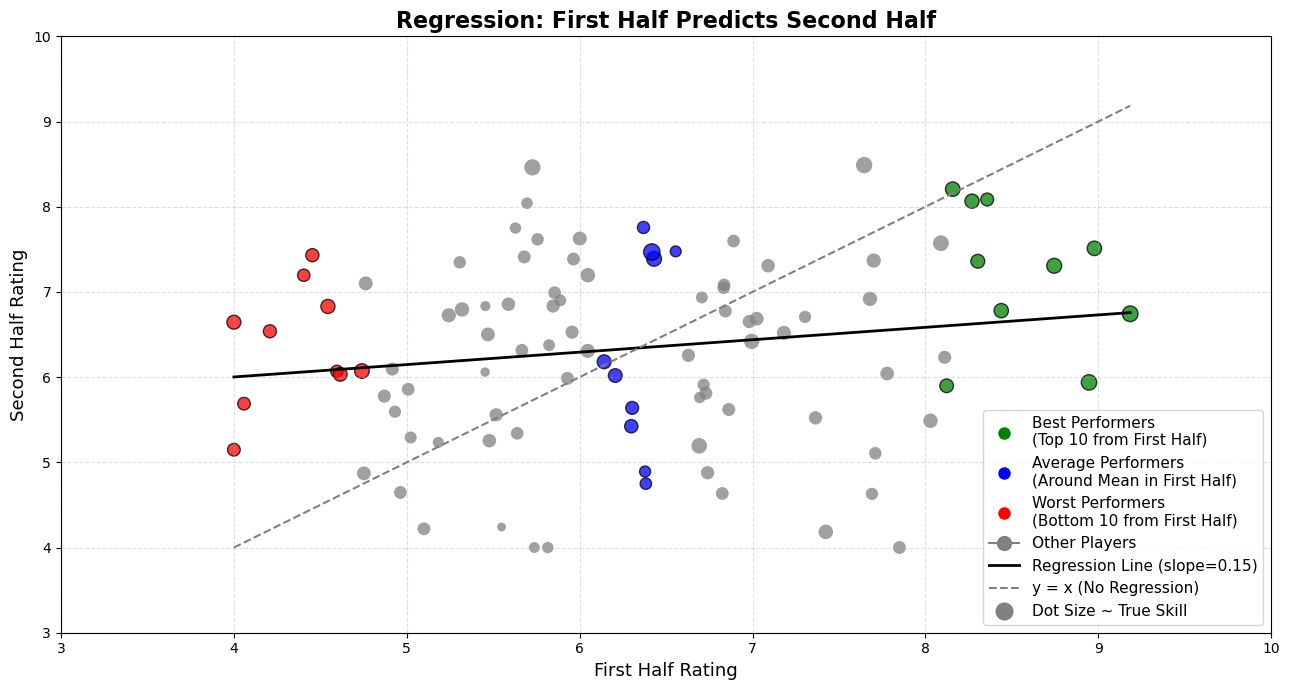

In [7]:
fig, ax = plot_regression_with_highlighted_groups(df, best_fh, worst_fh, avg_fh)
plt.show()

Why does that happen? Because football performance — like many things in life — is a mix of skill and randomness. And since randomness is unpredictable, the correlation between the two halves isn’t perfect. The slope reflects that imperfection. The less perfect the link, the more the extremes “shrink” toward the average. That’s regression to the mean in action — visualized.


# Real-World Players, Simulated Stories, Better Internalization

When we see just one dot _— a single observation —_ and that dot happens to represent someone we can relate to, our brains leap into action. We form causal relationships. We construct stories. And once those stories are formed, they’re stubborn. We hate ambiguity, and we act like everything must have a cause — even when there isn’t one.

As I promised above, for better internalisation from the reader -I mean you-, I want to name each of the examples with coherent stories/seasons of the players in my plot. Of course that's from a simulation, not the actual data. But still, by giving you relatable examplars that most of us know I want you to relate what my point really is. 

One more thing! Sorry had to hide it until that moment, remember `true_skill`? The **tone (shade)** of the observations in my plot implies the assumed true skill in the simulation. The darker the tone, the better the player truly is. With that in mind, feel free to pick your own little dot and match it to the examples I’m about to propose. Or even better — if you have a different player in mind, pick your own nominee.

🟢 We all remember **Grafite**, right? After his exceptional 2008–09 Bundesliga season—scoring 28 goals in just 25 games and winning German Footballer of the Year, —next year quickly he faded, perfectly illustrating why he's a great nominee for our “green” top performers. Let's call any of those 10 green dots as Grafite.

🔵 We all appreciate **César Azpilicueta**, don't we? His remarkable consistency (rarely missing a game and delivering reliably solid performances year after year) makes him an ideal candidate to represent our "blue" average performers.

🔴 I know, it may be harsh to put **Radamel Falcao** or **Eden Hazard** into any red classification. But after arriving at Manchester United in 2014, Falcao, once feared by defenders across Europe, managed only 4 goals the entire season. Also Hazard, Chelsea's standout player and Player of the Year in 2015, went without scoring a single Premier League goal until late April of the following season.

I hope you liked my nominees, or you have someone in your mind at least.

# Cognitive Bias: Narrative Causality
### Why We See Meaning Where There’s Just Math

Now, revisit those initial narratives — but this time, in light of the **full context**:

💬 **Formerly praised top player**, Grafite (now declined slightly):  
_“He got complacent after early praise. The fame went to his head.”_

💬 **Steady average** Azpilicueta:  
_“You know what to expect from him, but maybe he’s just too risk-averse. He’ll never dominate the S-tier.”_

💬 **Previously criticized bottom performer** (now improved), Falcao or Hazard:  
_“The harsh criticism woke him up. He finally took responsibility.”_

But take a step back.

Grafite didn’t “lose motivation.” His early peak was statistically unsustainable.
Azpilicueta doesn’t need to “do more.” He has a standard for his level, and consistent.
Falcao didn’t have some kind of magical awakening. He likely regressed back to where he always was.

Notice the perversity here.

- The top performer, still doing better than average, is criticized for not maintaining exceptional levels.
- The average player is underappreciated for being boring.
- The bottom performer, who simply returned to normal, is glorified for a comeback that may not exist.

This shift in narratives is subtle, and entirely driven by our misunderstanding of a simple statistical phenomenon, **Regression to the Mean--.


We invent stories to explain noise — because silence is uncomfortable. Whenever we see a single relatable observation, event, fact, or situation that stands out, our minds quickly fill in the blanks. We make **hasty causal conclusions**, because it feels better to assign meaning than to admit randomness. We're experiencing the cognitive ease when we connect things and make up narratives about those events, which will direct us through clearing the air by forming those narratives. 

If you say that an average player got **complacent** after being praised, you’ve built a **time-bound story**.  

If you say a poor performer was **awakened** by criticism, again — you’ve imposed a temporal cause-effect structure.  

> “This happened, _so_ that happened.”  
> “The praise came first, _therefore_ complacency followed.”  
> “The criticism was the catalyst, _therefore_ the improvement came.”

This is how causal conclusions work: one needs to occur to cause the other. Awakening occur because of harsh criticism, complacency occurs because of intense praise from media/fans. Those are the statements. 


If you're not fully convinced yet, let me try something else to convince you. Let’s **reverse the timeline** and look at the data from the other side.

Below, you’ll see the same style of plot. But this time from the **second half** perspective.

We’ll look at who performed extremely well or poorly in the second half of the season, and then ask:  
**How were they doing in the first half?**

---

# Reverse Perspective: Second Half First
### Flip the Script — The Pattern Holds

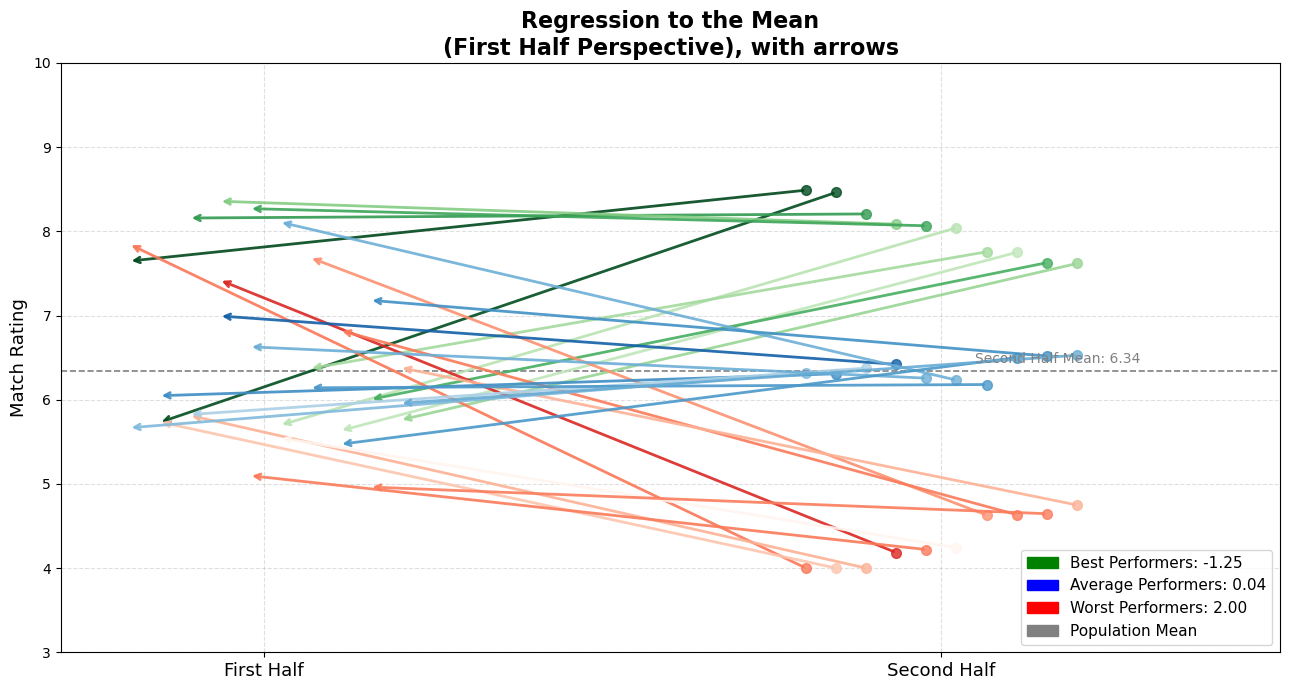

In [8]:
# --- Plot ---
fig, ax = plt.subplots(figsize=(13, 7))
plot_custom_arrows(ax, best_sh, perspective='sh', reveal_other_half=True, cmap=cm.Greens, norm=norm)
plot_custom_arrows(ax, worst_sh, perspective='sh', reveal_other_half=True, cmap=cm.Reds, norm=norm)
plot_custom_arrows(ax, avg_sh, perspective='sh', reveal_other_half=True, cmap=cm.Blues, norm=norm)
ax.axhline(sh_mean, linestyle='--', color='gray', linewidth=1.2)
ax.text(2.05, sh_mean + 0.1, f'Second Half Mean: {sh_mean:.2f}', color='gray', fontsize=10)
ax.set_title('Regression to the Mean\n(First Half Perspective), with arrows', fontsize=16, weight='bold')
ax.legend(handles=make_legend(best_sh, avg_sh, worst_sh), loc='lower right', fontsize=11)
plt.tight_layout()
plt.show()

I know — it’s a **simple simulation**. It can’t possibly capture the chaos, tactics, emotions, and complexity of real football. This isn’t about predicting player performance. But, we're discussing only the statistical regularity. Even here, in this modest model, do you notice the same pattern? Best performers decline, averages can go any way so that they balance in average, and worst performers improve. 

The inspiration for this perspective — and my personal vantage point on this — comes from a line in *Thinking, Fast and Slow* by Daniel Kahneman:

> _“The fact that you observe regression when you predict an early event from a later event should help convince you that regression does not have a causal explanation.”_

In simpler terms:

Whether you move forward from the first half or backward from the second, extreme outcomes tend to mellow. The regression isn’t caused by anything. It’s not about motivation, effort, or coaching. It’s just randomness, and natural fluctuation. Balancing itself out.

# Reflection and Final Thoughts
### The Most Honest Stories Aren’t About Extremes

Look — I’m not saying player psychology doesn’t matter. It absolutely does. Same with coaching, sports science, tactics… Football is way too complex to boil down to just one thing. But still — underneath all of that — there’s this quiet, invisible force that’s always doing its thing: **randomness**. Every season. Every match. Every player.

That wonderkid who looks unstoppable? There’s a bit of luck in those numbers.

That star player who suddenly goes missing? Might not be about motivation. Shit happens, that’s part of the game.

The problem starts when we start making stories up.

We say:

- “He got lazy after all the hype.”
- “That criticism lit a fire under him.”
- “He just doesn’t care anymore.”

And yeah, sometimes those things are true. But sometimes, and mostly they’re not. Because that’s what **regression to the mean** does. It **pulls the extremes back toward the middle**, whether we like it or not. Next time you see someone have a ridiculous season out of nowhere, or suddenly drop off a cliff, don’t jump straight to the storyline.

Take a second and zoom out. Maybe it’s not about character. Maybe it’s not about form or pressure or “desire.” Maybe it’s just the math doing its quiet thing in the background.

And that’s really what I want to leave you with:

> "The most honest stories aren’t about extremes — they’re about how no one stays there for long."
> - a humble reminder that extremes are temporary, and balance is the only constant.

It doesn’t mean football isn’t emotional. It doesn’t mean moments don’t matter. But I believe it does mean we should be a little more careful about the stories we attach to them.